## Question #1 (50 points)

***This question consists of plotting and a conceptual question. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for anharmonically coupled oscillators, create a figure that superimposes

* a contour plot of the potential energy, and;
* the trajectory of $Q_1$ and $Q_2$.

### Point breakdown

* Contour plot (20 points)
* Trajectory plot (20 points)
* Physical explanation (10 points)

### The potential energy

$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

### Constrained parameters and initial conditions

Take $K_1 = 1$, $K_2 = 0.2$, $M_1 = M_2 = 1$, and $C=0.5$. For the initial conditions, take $Q_1(0) = 0$, $Q_2(0) = 1$, and both velocities starting at zero.

### Plotting constraints
Plot $Q_1$ and $Q_2$ on the horizontal and vertical axes, respectively. I suggest a meshgrid of at least $100 \times 100$ points.

For your contour plot, combine `plt.contour` and `plt.contourf` with code similar to the following:

* `plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')`
* `plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)`

Also, use `plt.xlim(-1.5, 1.5)` and `plt.ylim(-1.5, 1.5)`

Don't forget to label your axes.

### Getting and plotting the trajectory

To get the trajectory, you will need to set up and solve the equations of motion, as we did in previous homework and in class. Then you can plot $Q_2$ versus $Q_1$ with `matplotlib` using a line of code similar to `plt.plot(Q1, Q2, color='red', label="Trajectory")`.

Plot the trajectory from $t=0$ to $t=50$, with an appropriate choice of mesh points to ensure the trajectory is resolved. (e.g. `t_mesh = np.linspace(0, 50, 200)`)

### Physical explanation

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$

Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced? How does this relate to the coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.


**Plotting the potential**

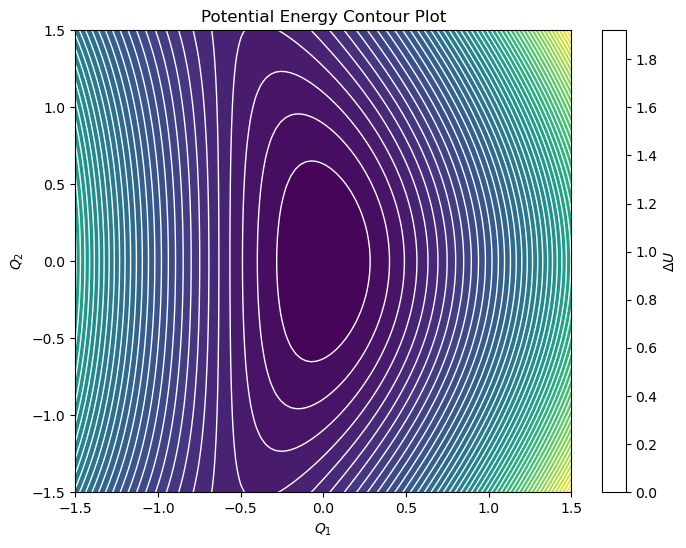

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
K1 = 1
K2 = 0.2
C = 0.5

# Define the potential energy function
def potential_energy(Q1, Q2, K1, K2, C):
    return 0.5 * K1 * Q1**2 + 0.5 * K2 * Q2**2 + (1/3) * C * Q1 * Q2**2

# Create meshgrid for Q1 and Q2
Q1_range = np.linspace(-1.5, 1.5, 100)  # Range for Q1 (100 x 100)
Q2_range = np.linspace(-1.5, 1.5, 100)  # Range for Q2
Q1_grid, Q2_grid = np.meshgrid(Q1_range, Q2_range)

# Compute potential energy on the grid
U_grid = potential_energy(Q1_grid, Q2_grid, K1, K2, C)

# Plot the contour plot
plt.figure(figsize=(8, 6))
plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')
plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)

# Plot settings
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel(r"$Q_1$")
plt.ylabel(r"$Q_2$")
plt.title("Potential Energy Contour Plot")
plt.colorbar(label=r"$\Delta U$")
plt.grid(False)  # Disable grid for better contour visibility

# Show plot
plt.show()


**Plotting the trajectory for:** $Q_1(0) = 0$, $Q_2(0) = 1$

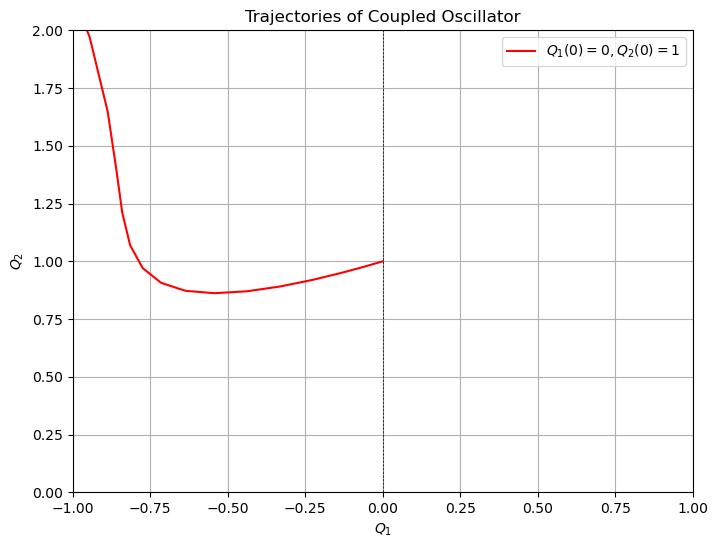

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
K1 = 1
K2 = 0.2
C = 0.5
M1 = 1
M2 = 1

# Define the equations of motion
def equations_of_motion(t, y):
    Q1, Q1_dot, Q2, Q2_dot = y
    # Accelerations
    Q1_ddot = -(K1 * Q1 + (C / M1) * Q2**2)
    Q2_ddot = -(K2 * Q2 + (2 * C / M2) * Q1 * Q2)
    return [Q1_dot, Q1_ddot, Q2_dot, Q2_ddot]

# Solve the system for a given set of initial conditions
def solve_trajectory(Q1_0, Q2_0, Q1_dot_0=0, Q2_dot_0=0, t_span=(0, 50), t_points=200):
    y0 = [Q1_0, Q1_dot_0, Q2_0, Q2_dot_0]  # Initial conditions
    t_mesh = np.linspace(t_span[0], t_span[1], t_points)
    sol = solve_ivp(equations_of_motion, t_span, y0, t_eval=t_mesh, method='RK45')
    return sol.t, sol.y

# Plot the trajectory for the specified initial conditions
def plot_trajectory(Q1_0, Q2_0, color, label):
    t, y = solve_trajectory(Q1_0, Q2_0)
    Q1, Q2 = y[0], y[2]
    plt.plot(Q1, Q2, color=color, label=label)

# Plot the trajectory
plt.figure(figsize=(8, 6))

# Case 1: Q1(0) = 0, Q2(0) = 1
plot_trajectory(0, 1, color='red', label=r"$Q_1(0) = 0, Q_2(0) = 1$")

# Details
plt.title("Trajectories of Coupled Oscillator")
plt.xlabel(r"$Q_1$")
plt.ylabel(r"$Q_2$")
plt.xlim(-1, 1)
plt.ylim(0, 2)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


**Plotting the trajectory (all four cases)**

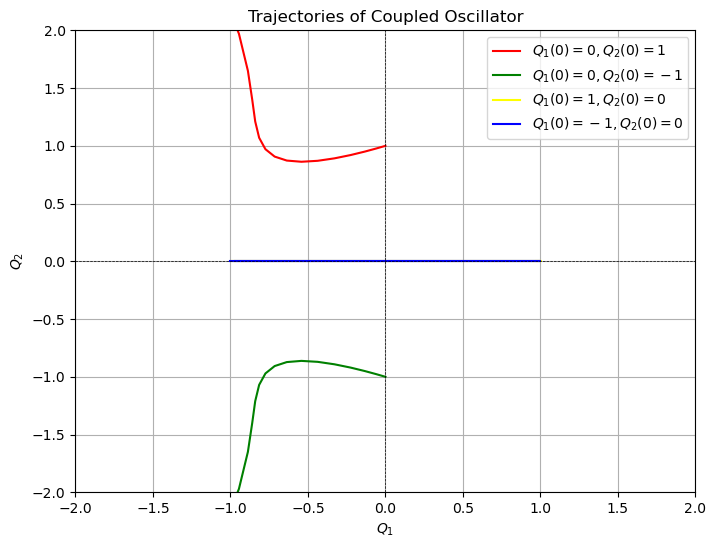

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
K1 = 1
K2 = 0.2
C = 0.5
M1 = 1
M2 = 1

# Define the equations of motion
def equations_of_motion(t, y):
    Q1, Q1_dot, Q2, Q2_dot = y
    # Accelerations
    Q1_ddot = -(K1 * Q1 + (C / M1) * Q2**2)
    Q2_ddot = -(K2 * Q2 + (2 * C / M2) * Q1 * Q2)
    return [Q1_dot, Q1_ddot, Q2_dot, Q2_ddot]

# Solve the system for a given set of initial conditions
def solve_trajectory(Q1_0, Q2_0, Q1_dot_0=0, Q2_dot_0=0, t_span=(0, 50), t_points=200):
    y0 = [Q1_0, Q1_dot_0, Q2_0, Q2_dot_0]  # Initial conditions
    t_mesh = np.linspace(t_span[0], t_span[1], t_points)
    sol = solve_ivp(equations_of_motion, t_span, y0, t_eval=t_mesh, method='RK45')
    return sol.t, sol.y

# Plot the trajectory for the specified initial conditions
def plot_trajectory(Q1_0, Q2_0, color, label):
    t, y = solve_trajectory(Q1_0, Q2_0)
    Q1, Q2 = y[0], y[2]
    plt.plot(Q1, Q2, color=color, label=label)

# Plot the trajectories for all four cases
plt.figure(figsize=(8, 6))

# Case 1: Q1(0) = 0, Q2(0) = 1
plot_trajectory(0, 1, color='red', label=r"$Q_1(0) = 0, Q_2(0) = 1$")

# Case 2: Q1(0) = 0, Q2(0) = -1
plot_trajectory(0, -1, color='green', label=r"$Q_1(0) = 0, Q_2(0) = -1$")

# Case 3: Q1(0) = 1, Q2(0) = 0
plot_trajectory(1, 0, color='yellow', label=r"$Q_1(0) = 1, Q_2(0) = 0$")

# Case 4: Q1(0) = -1, Q2(0) = 0
plot_trajectory(-1, 0, color='blue', label=r"$Q_1(0) = -1, Q_2(0) = 0$")

#Details
plt.title("Trajectories of Coupled Oscillator")
plt.xlabel(r"$Q_1$")
plt.ylabel(r"$Q_2$")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


**Physical Explanation**

*Effects of initail conditions*

The effects that the intial conditions have when only $Q_2 (0)$ is displaced is that for $Q_2 (0) = 1$ and $Q_2 (0) = -1$ they make a symmetric plot for the trajectory. This is because when $Q_2 (0)$ is displaced, the coupling term exerts a force on $Q_1 (0)$ that depends on $Q_2^2$ which means that the direction of $Q_2$ displacement does not matter.

For the displacemnt of $Q_1 (0)$ a similar assumptions can be made however this force is proprtional to $Q_1 Q_2$ and it acts on $Q_2 (0)$. Addintionally, in cases 3 and 4 $Q_2$ starts at equlibirum and because $Q_2 (0) = 0$ and the inital velocity is zero there is no inital force to make $Q_2 (0)$ deviate from equilibirum. Thus leading to cases 3 and 4 overlapping on the $Q_1$-axis

*Physical Interpretation*

Similar to the beam, $Q_1$ and $Q_2$ represent coupled modes of deformation. Displacing one mode(like bending) can excite another mode (like twisting) depending on the coupling strength.